In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [103]:
df = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/base.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Text(0.5, 1.0, 'Label')

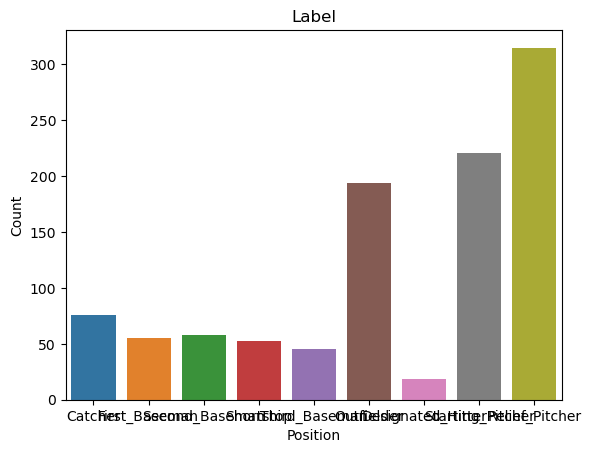

In [104]:
sns.countplot(data = df, x="Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Label")

<AxesSubplot:xlabel='Position', ylabel='Height(inches)'>

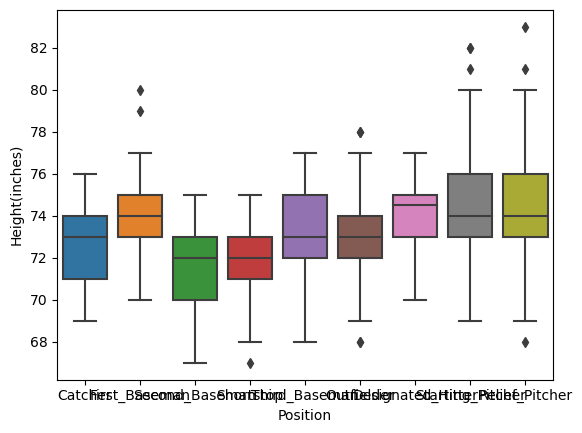

In [105]:
sns.boxplot(x='Position', y = 'Height(inches)', data = df)

<AxesSubplot:xlabel='Position', ylabel='Age'>

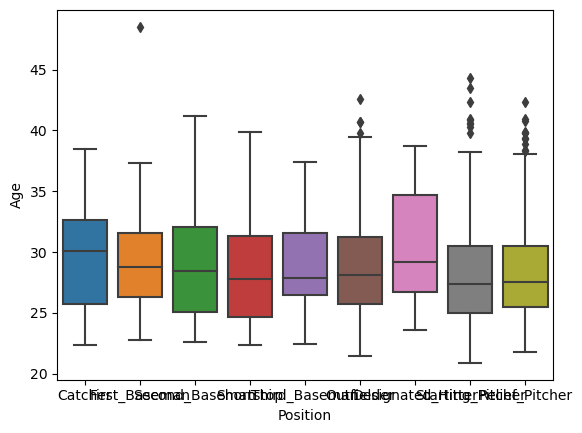

In [106]:
sns.boxplot(x='Position', y = 'Age', data = df)

In [107]:
df.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [108]:
df.dropna()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [109]:
df.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [110]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,7,15,35
1,794,3,0,7,50,625
2,817,3,0,5,45,482
3,628,3,2,5,45,645
4,199,3,2,6,23,653


In [111]:
x = df.drop('Position', axis=1)
y= df['Position']

In [112]:
x

,Name,Team,Height(inches),Weight(pounds),Age
0,12,3,7,15,35
1,794,3,7,50,625
2,817,3,5,45,482
3,628,3,5,45,645
4,199,3,6,23,653
...,...,...,...,...,...
1029,105,25,6,25,145
1030,997,25,7,15,190
1031,202,25,8,40,153
1032,824,25,8,25,496


In [113]:
y

0       0
1       0
2       0
3       2
4       2
       ..
1029    4
1030    4
1031    4
1032    4
1033    4
Name: Position, Length: 1034, dtype: int64

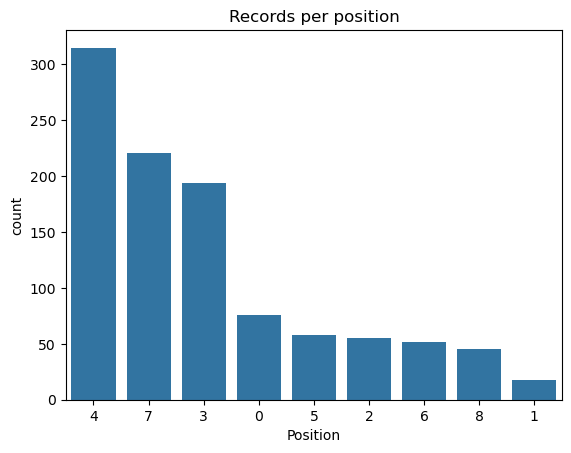

In [114]:
sns.countplot(x = "Position", data = df, palette = [sns.color_palette()[0]],

              order = df.Position.value_counts().index)

plt.title("Records per position");

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(775, 5) (775,)
(259, 5) (259,)


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Radom Forest ---
mse: 2.6848639087473707
mae: 2.027027027027027


In [122]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Decision Tree Classifier ---
mse: 3.1217260842639196
mae: 2.4555984555984556


In [123]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- SVM Classifier ---
mse: 2.2239482786130496
mae: 1.6872586872586872


In [125]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Logistic Regression Classifier ---
mse: 2.28728228071225
mae: 1.7567567567567568
